# Data Analysis

## Importing the Cleaned Data Frames

In [281]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
%matplotlib inline
import plotly.graph_objects as go

In [282]:
# Since we're using the same kernel as the other notebook, we're able to use the same dataframe names
# Inflation rate per year
inflation_df.head()

,Annual
Year,
1980,12.4
1981,10.4
1982,7.4
1983,4.0
1984,5.0


In [283]:
inflation_df.describe()

,Annual
count,44.000000
mean,3.386364
std,2.249402
min,1.000000
25%,2.100000
50%,2.450000
75%,4.150000
max,12.400000


In [284]:
# Mortgage rate per year
mort_avg_df.head()

,MORTGAGE30US
Year,
1971,7.541750
1972,7.383269
1973,8.044808
1974,9.187115
1975,9.047115


In [485]:
# Median Household Income per year
median_income_df.head()

,MEHOINUSA646N
Year,
1984,22420
1985,23620
1986,24900
1987,26060
1988,27230


In [486]:
# Median House Price per year
median_house_df.head()

,MSPUS
Year,
1963,18050.0
1964,18925.0
1965,20125.0
1966,21500.0
1967,22750.0


In [287]:
# U.S. National Debt per year
us_debt_df.head()

,Debt Outstanding Amount
Year,
2023,3.316733e+13
2022,3.092891e+13
2021,2.842892e+13
2020,2.694539e+13
2019,2.271940e+13


In [288]:
# Price for a Pound of Chicken per year
chicken_df.head()

,Average Chicken Price per Pound
Year,
1980,0.709
1981,0.732
1982,0.714
1983,0.725
1984,0.810


In [289]:
# Price for a Pound of Coffee per year
coffee_df.head()

,Average Coffee Price
Year,
1980,3.142
1981,2.527
1982,2.524
1983,2.466
1984,2.578


In [290]:
# Price of Electricity per PWH per year
electricity_df.head()

,Average Electricity Price
Year,
1980,0.060
1981,0.069
1982,0.076
1983,0.078
1984,0.082


In [291]:
# Price of Gasoline per gallon per year
gasoline_df.head()

,Average Gasoline Price
Year,
1980,1.221
1981,1.353
1982,1.281
1983,1.225
1984,1.198


In [292]:
# Price for a Pound of White Bread per year
bread_df.head()

,Average Bread Price
Year,
1980,0.509
1981,0.525
1982,0.532
1983,0.542
1984,0.541


## Creating  Plot Objects

### Grocery Price Trend: Chicken, Coffee, Bread

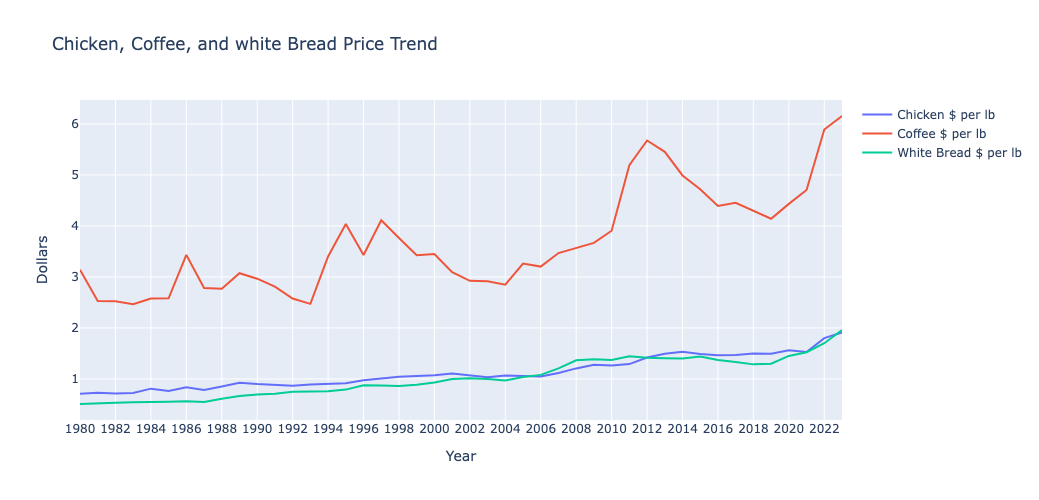

In [313]:
fig = go.Figure()

# Adding Chicken
fig.add_trace(go.Scatter(x=chicken_df.index, y=chicken_df['Average Chicken Price per Pound'], mode='lines', name='Chicken $ per lb'))

# Addding Coffee
fig.add_trace(go.Scatter(x=coffee_df.index, y=coffee_df['Average Coffee Price'], mode='lines', name='Coffee $ per lb'))

# Adding Bread
fig.add_trace(go.Scatter(x=bread_df.index, y=bread_df['Average Bread Price'], mode='lines', name='White Bread $ per lb'))


fig.update_layout(width=1000, height = 500, title='Chicken, Coffee, and white Bread Price Trend', xaxis_title='Year', yaxis_title='Dollars')
fig.update_xaxes(dtick=2, tickmode='linear')

fig.show()

#### Grocery Price Percent Change

In [314]:
# Chicken price percent change
value_1980 = chicken_df.loc[1980, 'Average Chicken Price per Pound']
value_2023 = chicken_df.loc[2023, 'Average Chicken Price per Pound']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

169.95768688293373

In [315]:
# Coffee price percent change
value_1980 = coffee_df.loc[1980, 'Average Coffee Price']
value_2023 = coffee_df.loc[2023, 'Average Coffee Price']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

95.92616168045829

In [316]:
# Bread price percent change
value_1980 = bread_df.loc[1980, 'Average Bread Price']
value_2023 = bread_df.loc[2023, 'Average Bread Price']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

285.0687622789784

### Utilities and Transportation Price Trend

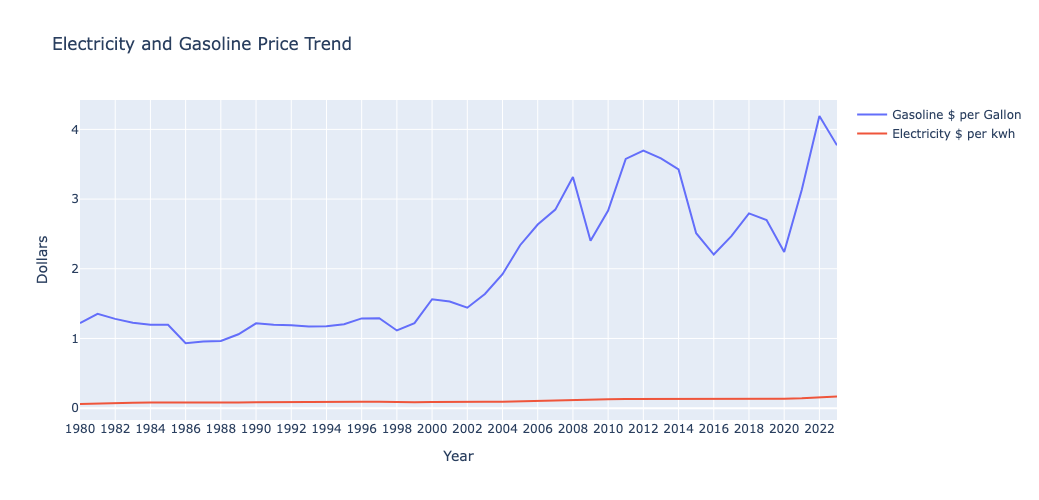

In [317]:
fig2 = go.Figure()

# Creating Gasoline $ per gallon Plot
fig2.add_trace(go.Scatter(x=gasoline_df.index, y=gasoline_df['Average Gasoline Price'], mode='lines', name='Gasoline $ per Gallon'))

# Creating Electricity $ per kwh Plot
fig2.add_trace(go.Scatter(x=electricity_df.index, y=electricity_df['Average Electricity Price'], mode='lines', name='Electricity $ per kwh'))


fig2.update_layout(width=1000, height = 500, title='Electricity and Gasoline Price Trend', xaxis_title='Year', yaxis_title='Dollars')
fig2.update_xaxes(dtick=2, tickmode='linear')

fig2.show()

#### Utilities and Transportation Price Percent Change

In [319]:
# Gasoline price percent change
value_1980 = gasoline_df.loc[1980, 'Average Gasoline Price']
value_2023 = gasoline_df.loc[2023, 'Average Gasoline Price']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

208.84520884520882

In [321]:
# Electricity price percent change
value_1980 = electricity_df.loc[1980, 'Average Electricity Price']
value_2023 = electricity_df.loc[2023, 'Average Electricity Price']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

180.00000000000003

### General Cost of Living

In [295]:
# Mortgage Rate and Median House Cost 
house_prices_plot = median_house_df.hvplot.line(label='Median House Price', ylabel='Median House Price')
mortgage_rates_plot = mort_avg_df.hvplot.line(label='30-Year Mortgage Rate', ylabel='30-Year Mortgage Rate')

# Combine the two plots
combined_plot = house_prices_plot * mortgage_rates_plot

combined_plot = combined_plot.opts(
    title='Median House Price vs 30-Year Mortgage Rate',                          
    width=900,                           
    height=500, 
    multi_y=True, 
    legend_position='bottom',
    yformatter='%.0f')

# Show the combined plot
combined_plot

:Overlay
   .Curve.Median_House_Price                   :Curve   [Year]   (MSPUS)
   .Curve.A_30_hyphen_minus_Year_Mortgage_Rate :Curve   [Year]   (MORTGAGE30US)

#### Percent Changes for House Price and 30yr Mortgage Rate

In [484]:
# Median House price percent change
value_1980 = median_house_df.loc[1980, 'MSPUS']
value_2023 = median_house_df.loc[2023, 'MSPUS']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

558.1724581724582

In [323]:
# Mortgage Rate percent change
value_1980 = mort_avg_df.loc[1980, 'MORTGAGE30US']
value_2023 = mort_avg_df.loc[2023, 'MORTGAGE30US']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

-50.468100589149024

In [296]:
# Median Household Income and Inflation Rate
median_income_plot = median_income_df.hvplot.line(label='Median Household Income', ylabel='Median Household Income')
inflation_rate_plot = inflation_df.hvplot.line(label='Annual Inflation Rate', ylabel='Annual Inflation Rate')

# Combine the two plots
combined_plot_ii = median_income_plot * inflation_rate_plot

combined_plot_ii = combined_plot_ii.opts(
    title='Median Household Income vs Annual Inflation Rate',
    width=900, 
    height=500, 
    multi_y=True, 
    legend_position='bottom'
)

combined_plot_ii

:Overlay
   .Curve.Median_Household_Income :Curve   [Year]   (MEHOINUSA646N)
   .Curve.Annual_Inflation_Rate   :Curve   [Year]   (Annual)

#### Percent Change for Median Household Income and Inflation Rate

In [490]:
# Median Household Income percent change
value_1980 = median_income_df.loc[1984, 'MEHOINUSA646N']
value_2023 = median_income_df.loc[2022, 'MEHOINUSA646N']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

232.64942016057094

In [491]:
# Inflation Rate percent change
value_1980 = inflation_df.loc[1980, 'Annual']
value_2023 = inflation_df.loc[2023, 'Annual']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

-61.29032258064516

#### Plot

In [297]:
# Median Household Income and Median House Price 
combine_plot_pi = median_income_plot * house_prices_plot
combine_plot_pi = combine_plot_pi.opts(
    title='Median Household Income vs Median House Price',
    width=900, 
    height=400, 
    legend_position='bottom', 
    yformatter='%.0f')
combine_plot_pi

:Overlay
   .Curve.Median_Household_Income :Curve   [Year]   (MEHOINUSA646N)
   .Curve.Median_House_Price      :Curve   [Year]   (MSPUS)

#### Percent Change for Median Household Income and Median House Price

In [492]:
# Median Household Income percent change
value_1980 = median_income_df.loc[1984, 'MEHOINUSA646N']
value_2023 = median_income_df.loc[2022, 'MEHOINUSA646N']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

232.64942016057094

In [493]:
# Median House price percent change
value_1980 = median_house_df.loc[1980, 'MSPUS']
value_2023 = median_house_df.loc[2023, 'MSPUS']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

558.1724581724582

#### Plot

In [298]:
# Annual Inflation Rate and Mortgage Rate
combined_plot_mi = inflation_rate_plot * mortgage_rates_plot
combined_plot_mi = combined_plot_mi.opts(
    title='Annual Inflation Rate vs 30-Year Mortgage Rate', 
    ylabel='Annual Average Rate',
    width=900,
    height=500,
    legend_position='bottom'
)
combined_plot_mi

:Overlay
   .Curve.Annual_Inflation_Rate                :Curve   [Year]   (Annual)
   .Curve.A_30_hyphen_minus_Year_Mortgage_Rate :Curve   [Year]   (MORTGAGE30US)

#### Percent Change for Inflation and Mortgage Rate

In [494]:
# Inflation Rate percent change
value_1980 = inflation_df.loc[1980, 'Annual']
value_2023 = inflation_df.loc[2023, 'Annual']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

-61.29032258064516

In [495]:
# Mortgage Rate percent change
value_1980 = mort_avg_df.loc[1980, 'MORTGAGE30US']
value_2023 = mort_avg_df.loc[2023, 'MORTGAGE30US']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

-50.468100589149024

#### Plot

In [299]:
# US Debt and Annual Inflation Rate
# Plot for US National Debt
usdebt_plot = us_debt_df.hvplot.line(label='US Debt', ylabel='US Debt in Trillions', hover_cols='all') 

# Combine the two plots
combined_plot_di = usdebt_plot * inflation_rate_plot

combined_plot_di = combined_plot_di.opts(title='US National Debt vs Annual Inflation Rate', width=900, height=500, multi_y=True, legend_position='bottom', yformatter='%.0f')

combined_plot_di

:Overlay
   .Curve.US_Debt               :Curve   [Year]   (Debt Outstanding Amount)
   .Curve.Annual_Inflation_Rate :Curve   [Year]   (Annual)

#### Percent Change for US National Debt and Annual Inflation Rate

In [497]:
# Mortgage Rate percent change
value_1980 = us_debt_df.loc[1980, 'Debt Outstanding Amount']
value_2023 = us_debt_df.loc[2023, 'Debt Outstanding Amount']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

3553.9933353299334

In [498]:
# Inflation Rate percent change
value_1980 = inflation_df.loc[1980, 'Annual']
value_2023 = inflation_df.loc[2023, 'Annual']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

-61.29032258064516

#### Plot

In [300]:
# US Debt and Median Household Income
combined_plot_dmi = usdebt_plot * median_income_plot
combined_plot_dmi = combined_plot_dmi.opts(
    title='National US Debt vs Median Household Income', 
    width=900,height=500,
    legend_position='bottom',
    multi_y=True
)
combined_plot_dmi

:Overlay
   .Curve.US_Debt                 :Curve   [Year]   (Debt Outstanding Amount)
   .Curve.Median_Household_Income :Curve   [Year]   (MEHOINUSA646N)

In [499]:
# Mortgage Rate percent change
value_1980 = us_debt_df.loc[1980, 'Debt Outstanding Amount']
value_2023 = us_debt_df.loc[2023, 'Debt Outstanding Amount']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

3553.9933353299334

In [500]:
# Median Household Income percent change
value_1980 = median_income_df.loc[1984, 'MEHOINUSA646N']
value_2023 = median_income_df.loc[2022, 'MEHOINUSA646N']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

232.64942016057094